<a href="https://colab.research.google.com/github/Kalidsa/JAI---Previs-o-de-sentimentos/blob/main/Jai_Kalidsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo geral -  trabalho de mineração de textos


---



**Aluna: Kalidsa Oliveira**

**Curso: Engenharia de Computação**

 **Disciplina: Ciência de dados II**



---

Este trabalho tem por objetivo desenvolver e avaliar os seus conhecimentos e
habilidades em relação a aplicação das etapas do processo de KDT (Knowledge Discovery
in Texts) estudadas em aula: seleção, limpeza, transformação, mineração e
interpretação de dados. Trata-se, portanto, de um projeto de mineração de textos.

Para tanto, foram coletados 300 comentários de usuários para cada um dos
aplicativos supracitados, totalizando 3.000 comentários. Para cada comentário,
avaliadores humanos o classificaram em uma polaridade (positivo ou negativo) e em
uma emoção de acordo com as emoções básicas de Ekman e Cordaro (2011) que são:

• Felicidade: Representa uma experiência gratificante e positiva para o usuário ao usar o aplicativo;

• Surpresa: Indica uma reação inesperada e positiva do usuário durante a utilização do aplicativo;

• Tristeza: Reflete o sentimento de descontentamento ou a ausência de uma característica desejada no aplicativo, mas mantém uma apreciação geral pelo aplicativo;

• Neutro: Caracteriza a neutralidade na avaliação, com a ausência de manifestações emocionais;

• Medo: Sinaliza a presença de medo ou insegurança por parte do usuário relacionado ao uso do aplicativo;

• Nojo: Descreve uma sensação desagradável causada por uma
característica do aplicativo, prejudicando a experiência do usuário;

• Raiva: Atribuída quando há um nível notável de agressividade na
avaliação do usuário.

---
**O que você deve ser feito:**


*   BoW + NaiveBayes
*   TF-IDF + NaiveBayes
*   BoW + KNN
*   TF-IDF + KNN
*   Rede neural com embedding (Word2Vec, GloVe, Doc2Vec)
*   BERTimbau
*   LLama

**--> Rede neural com embedding (Word2Vec, GloVe, Doc2Vec):** Pesquise, descreva o que são e escolha o que melhor se
adequar aos dados disponíveis e ao algoritmo de rede neural escolhido para PLN.

--> Representar a mesma base de comentários, utilizando o modelo TF-IDF e testar novamente a estratégia de predição usando o algoritmo NaiveBayes do código base. Repetir utilizando o algoritmo KNN.

--> Usar modelos pré-treinados avançados como o BERTimbau e o Llamma.

--> Analisar os resultados obtidos em termos de performance (precisão, revocação, medida-F e matriz de confusão).

--> Usar o método de amostragem mais adequado de acordo com o problema (holdout, cross-validation ou
estratificado).

--> Comparar as estratégias de predição em termos de performance e escolher aquela com maior performance para realizar a predição de três comentários não existentes no conjunto original de treino. Avalie qualitativamente se o comentário que você escolheu condiz com a emoção e a polaridade determinadas pelo algoritmo.




---

#Dados que devem ser analisados:



1.  **Precision:** A precisão mede a proporção de verdadeiros positivos entre todos os itens classificados como positivos pelo modelo. Em outras palavras, é a taxa de acertos do modelo para cada classe. Uma alta precisão significa que a maioria das previsões positivas são corretas.


2.  **Recall:** Mede a proporção de verdadeiros positivos entre todos os itens que realmente pertencem à classe positiva. Em outras palavras, é a capacidade do modelo de encontrar todos os itens positivos.



3.  **F1-Score:** é a média harmônica da precisão e do recall.

4.  **Support:** O número de ocorrências reais de cada classe no conjunto de teste.

5. **Accuracy:** É a métrica de avaliação usada para medir o desempenho de um modelo de classificação e representa a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões feitas. Ou seja, a acurácia é a fração de instâncias corretamente classificadas entre todas as instâncias.





---
# Validação cruzada estratificada:

A tabela abaixo estão os resultados das validações utilizando holdout.

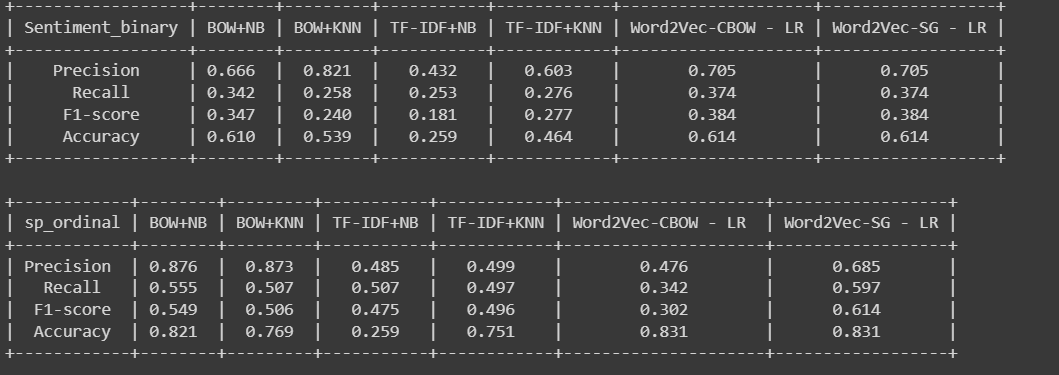


E a seguir os dados com validação estratificada:
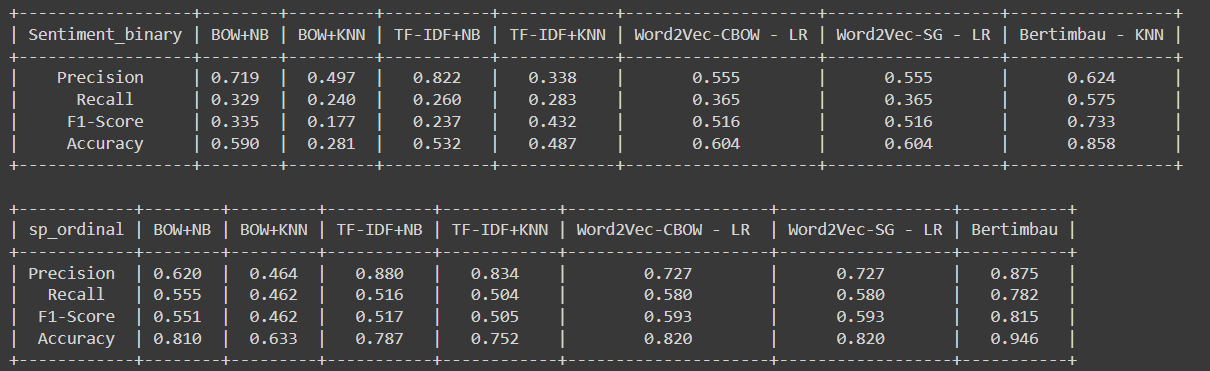


Os valores de validações para a coluna sentiment_polarity foram melhores com a validação estratificada do que com holdout.


#Motivos de escolha:
* **Validação Estratificada:**
  * Garante que a distribuição das classes (rótulos) é preservada em cada conjunto de dados (treinamento e teste). Isso é especialmente importante em problemas de classificação com classes desbalanceadas, onde algumas classes são muito mais frequentes do que outras.
  *  Ao garantir que cada conjunto de dados tem a mesma distribuição de classes, proporciona uma avaliação mais confiável e reprodutível do desempenho do modelo.
  *  Permite o uso mais eficiente dos dados, especialmente em conjuntos de dados pequenos, ao garantir que cada subconjunto de validação tem uma boa representação de todas as classes.
  * Facilita a comparação entre diferentes modelos ou técnicas de validação, pois a distribuição das classes é consistente em todas as iterações.

  Enquanto o holdout:
  * Pode levar a uma divisão desigual das classes, o que pode resultar em conjuntos de treinamento e teste com uma distribuição diferente da distribuição real das classes.
  * Pode ser mais suscetível a variações na distribuição das classes dependendo da aleatoriedade da divisão dos dados, o que pode levar a avaliações menos consistentes.
  * Pode ser menos eficiente se a divisão resultar em subconjuntos que não são suficientemente representativos de todas as classes.
  * Pode levar a uma avaliação menos precisa, especialmente se os conjuntos de treinamento e teste não representarem bem a distribuição das classes.

In [1]:
from google.colab import drive
drive.flush_and_unmount()

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import regex
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, f1_score,precision_recall_fscore_support
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Carregamento dos dados
O código abaixo lê o arquivo CSV avaliacoes_playStore.csv em um DataFrame e exibe as primeiras cinco linhas desse DataFrame.

In [4]:
data_content = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apps_reviews.csv', sep=',')
data_content

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,Não funciona!! Reconhimento facial diz que nen...,negative,disgust,NaN
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,A experiência com o App não está sendo boa. El...,negative,disgust,NaN
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,"Não consigo logar de jeito nenhum, o código de...",negative,disgust,NaN
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,Funcionava até ultima atualização. Por algum m...,negative,disgust,NaN


In [5]:
data_content.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [6]:
data_content.loc[0, 'content']

'O app da Shopee é razoável. Apesar de ser fácil de utilizar, apresenta alguns bugs. Por exemplo: Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada. Sugestões de produtos que não têm nada a ver com coisas de nosso interesse. Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada. Falhas para carregar certos anexos para avaliação dos produtos. No geral, são problemas que se pode contornar, pois não ocorrem com tanta frequência.'

## Pré-processamento

Remoção dos caracteres que não são latinos e colocando todas as palavras para minúsculas

In [7]:
data_content['content'] = data_content['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))

data_content['content'] = data_content['content'].apply(lambda x: str(x).lower())

data_content.loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [8]:
def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

data_content['content'] = data_content['content'].apply(remove_stopwords)

data_content.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Exploração de dados

Abaixo são gerados gráficos para as váriavies categóricas: sentiment e sentiment_polarity, para podermos explorar através dos histogramas a contagem desses valores separados nas suas categorias.





In [9]:
px.histogram(data_content, x='sentiment')

In [10]:
px.histogram(data_content, x='sentiment_polarity')

In [11]:
px.histogram(data_content, x = 'sentiment', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [12]:
px.histogram(data_content, x = 'app_name', text_auto = True, color = 'sentiment_polarity',  barmode = 'group')

In [13]:
px.histogram(data_content, x = 'app_name', text_auto = True, color = 'sentiment',  barmode = 'group')


# Verificação de dados de interesse únicos

Para as colunas de sentiment_polarity e sentiment


In [14]:
data_content['sentiment_polarity'].value_counts()

,count
sentiment_polarity,
negative,1742
positive,1187
neutral,82


In [15]:
sent_pol_val = data_content['sentiment_polarity'].unique()
sent_pol_val

array(['positive', 'negative', 'neutral'], dtype=object)

In [16]:
data_content['sentiment'].value_counts()

,count
sentiment,
disgust,952
sadness,864
anger,743
happiness,319
neutral,82
fear,47
surprise,4


In [17]:
sent_val = data_content['sentiment'].unique()

sent_val_dft = pd.DataFrame(sent_val, columns=['sentiment'])
sent_val_dft

,sentiment
0,sadness
1,disgust
2,happiness
3,anger
4,fear
5,surprise
6,neutral


#Extração da features (representação de texto em formato vetorial)



---

# BoW + NaiveBayes

---

* **CountVectorizer:** É uma ferramenta da biblioteca scikit-learn que converte uma coleção de documentos de texto em uma matriz de contagem de palavras. Cada documento é representado por um vetor em que cada elemento é o número de vezes que uma palavra (ou token) aparece no documento.
* **fit_transform:** Ajusta o CountVectorizer aos dados textuais na coluna content do DataFrame data_content e transforma esses dados em uma matriz esparsa de contagem de palavras. Cada linha na matriz representa um documento e cada coluna representa uma palavra do vocabulário.
* **MultinomialNB:** Classificador Naive Bayes baseado em um modelo multinomial, adequado para dados de contagem ou frequência de palavras.

In [18]:
naive_bayes = MultinomialNB()
vectorizer = CountVectorizer()

In [19]:
bownb_matriz = vectorizer.fit_transform(data_content['content'])
bownb_df = pd.DataFrame(bownb_matriz.toarray(),columns=vectorizer.get_feature_names_out())
bownb_df

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.
As categorias serão analisadas pelas colunas sentiment e sentiment_polarity, enquanto as características são analisadas pelo BOW da coluna content.



#Para dataframe e valores originais

* **StratifiedKFold:** Método de validação cruzada estratificada que divide os dados em n_splits (4 no caso) que são divisões em 4 partes do conjunto de dados para a validação. Onde  modelo será treinado em 3 e testado em 1.
  * **shuffle=True:** Embaralha os dados antes de dividir.
  * **random_state=42:**  garante que o embaralhamento dos dados seja reprodutível. Usar um valor fixo (neste caso, 42) permite que você e outros reproduzam exatamente os mesmos folds em diferentes execuções do código.

* **cross_val_predict:** Realiza validação cruzada e retorna as previsões para cada amostra do conjunto de dados, usando o classificador naive_bayes e a configuração de validação cruzada definida por skf.
* **precision_recall_fscore_support:** Calcula precisão, recall e F1-score para cada classe, com a média macro (média das métricas para todas as classes).
* **accuracy_score:** Calcula a acurácia global do classificador.

Abaixo é calculada a matriz de confusão comparando as categorias reais (catg_bownb) com as categorias previstas (predictions_dc).
A **matriz de confusão** é uma tabela que mostra o número de previsões corretas e incorretas para cada classe.

In [20]:
txt_bownb = bownb_df
catg_bownb = data_content['sentiment']

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
predictions_bownb = cross_val_predict(naive_bayes , txt_bownb, catg_bownb, cv=skf, method='predict')
precision_bownb, recall_bownb, f1_bownb, _ = precision_recall_fscore_support(catg_bownb, predictions_bownb, average='macro', zero_division=1)
accuracy_bownb = accuracy_score(catg_bownb, predictions_bownb)

print(classification_report(catg_bownb , predictions_bownb, zero_division=1))

result_bownb = {
      'Precision':f"{precision_bownb:.3f}",
      'Recall': f"{recall_bownb:.3f}",
      'F1-Score': f"{f1_bownb:.3f}",
      'Accuracy': f"{accuracy_bownb:.3f}",
}
result_bownb


              precision    recall  f1-score   support

       anger       0.62      0.53      0.57       743
     disgust       0.56      0.64      0.60       952
        fear       1.00      0.00      0.00        47
   happiness       0.78      0.37      0.50       319
     neutral       0.50      0.01      0.02        82
     sadness       0.58      0.76      0.66       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.59      3011
   macro avg       0.72      0.33      0.34      3011
weighted avg       0.61      0.59      0.57      3011



{'Precision': '0.719',
 'Recall': '0.329',
 'F1-Score': '0.335',
 'Accuracy': '0.590'}

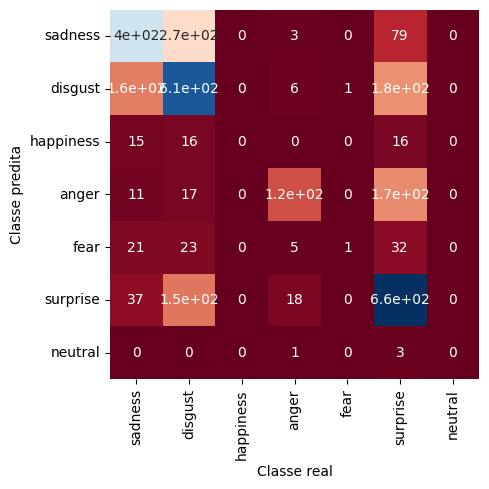

In [21]:
cm = confusion_matrix(catg_bownb, predictions_bownb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb.unique(),
            yticklabels=catg_bownb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [22]:
catg_bownb1= data_content['sentiment_polarity']

predictions_bownb1 = cross_val_predict(naive_bayes , txt_bownb, catg_bownb1, cv=skf, method='predict')
precision_bownb1, recall_bownb1, f1_bownb1, _ = precision_recall_fscore_support(catg_bownb1, predictions_bownb1, average='macro', zero_division=1)
accuracy_bownb1 = accuracy_score(catg_bownb1, predictions_bownb1)

print(classification_report(catg_bownb1, predictions_bownb1, zero_division=1))

result_bownb1 = {
      'Precision':f"{precision_bownb1:.3f}",
      'Recall': f"{recall_bownb1:.3f}",
      'F1-Score': f"{f1_bownb1:.3f}",
      'Accuracy': f"{accuracy_bownb1:.3f}",
}
result_bownb1

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1742
     neutral       0.25      0.01      0.02        82
    positive       0.77      0.80      0.78      1187

    accuracy                           0.81      3011
   macro avg       0.62      0.56      0.55      3011
weighted avg       0.80      0.81      0.80      3011



{'Precision': '0.620',
 'Recall': '0.555',
 'F1-Score': '0.551',
 'Accuracy': '0.810'}

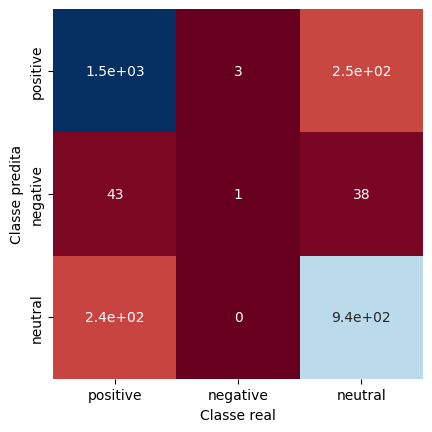

In [23]:
cm = confusion_matrix(catg_bownb1, predictions_bownb1)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=catg_bownb1.unique(),
            yticklabels=catg_bownb1.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

 # TF-IDF + Naive Bayes


---

* **TfidfVectorizer:** é uma técnica de vetorização de texto usada para representar documentos de forma numérica, levando em consideração a importância relativa de palavras em um conjunto de documentos. É uma melhoria sobre a simples contagem de palavras (bag-of-words) ao ajustar a frequência das palavras com base em sua importância no corpus, ou seja, no conjunto de textos ou documentos usados para análise, treinamento ou avaliação de modelos de linguagem.
  * **Term Frequency (TF):** Mede a frequência de uma palavra em um documento. Quanto mais a palavra aparece no documento, mais importante ela é.
  * **Inverse Document Frequency (IDF):**  Mede a importância de uma palavra em todo o corpus de documentos. A ideia é que palavras que aparecem em muitos documentos são menos importantes porque são menos discriminativas.

In [24]:
tfidf = TfidfVectorizer()

In [25]:
vectorizer_tfidf = tfidf.fit_transform(data_content['content'])

tfidf_DataFrame = pd.DataFrame(vectorizer_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_DataFrame.head(20)

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [26]:
txt_tfidfnb = tfidf_DataFrame
categ_tfidfnb = data_content['sentiment']

predictions_tfidfnb = cross_val_predict(naive_bayes, txt_tfidfnb, categ_tfidfnb, cv=skf, method='predict')
precision_tfidfnb, recall_tfidfnb, f1_tfidfnb, _ = precision_recall_fscore_support(categ_tfidfnb , predictions_tfidfnb, average='macro', zero_division=1)
accuracy_tfidfnb = accuracy_score(categ_tfidfnb , predictions_tfidfnb)

print(classification_report(categ_tfidfnb, predictions_tfidfnb, zero_division=1))

result_tfidfnb  = {
      'Precision':f"{precision_tfidfnb :.3f}",
      'Recall': f"{recall_tfidfnb :.3f}",
      'F1-Score': f"{f1_tfidfnb :.3f}",
      'Accuracy': f"{accuracy_tfidfnb :.3f}",
}
result_tfidfnb

              precision    recall  f1-score   support

       anger       0.74      0.32      0.44       743
     disgust       0.50      0.76      0.60       952
        fear       1.00      0.00      0.00        47
   happiness       1.00      0.00      0.01       319
     neutral       1.00      0.00      0.00        82
     sadness       0.52      0.74      0.61       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.53      3011
   macro avg       0.82      0.26      0.24      3011
weighted avg       0.64      0.53      0.48      3011



{'Precision': '0.822',
 'Recall': '0.260',
 'F1-Score': '0.237',
 'Accuracy': '0.532'}

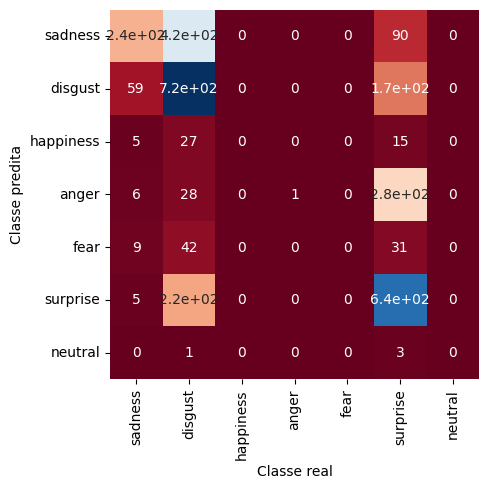

In [27]:
cm = confusion_matrix(categ_tfidfnb, predictions_tfidfnb)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels=categ_tfidfnb.unique(),
            yticklabels=categ_tfidfnb.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [28]:
categ_tfidfnb2  = data_content['sentiment_polarity']

predictions_tfidfnb2 = cross_val_predict(naive_bayes, txt_tfidfnb, categ_tfidfnb2, cv=skf, method='predict')
precision_tfidfnb2, recall_tfidfnb2, f1_tfidfnb2, _ = precision_recall_fscore_support(categ_tfidfnb2, predictions_tfidfnb2, average='macro', zero_division=1)
accuracy_tfidfnb2 = accuracy_score(categ_tfidfnb2 , predictions_tfidfnb2)

print(classification_report(categ_tfidfnb2, predictions_tfidfnb2, zero_division=1))

result_tfidfnb2  = {
      'Precision':f"{precision_tfidfnb2 :.3f}",
      'Recall': f"{recall_tfidfnb2 :.3f}",
      'F1-Score': f"{f1_tfidfnb2 :.3f}",
      'Accuracy': f"{accuracy_tfidfnb2 :.3f}",
}
result_tfidfnb2

              precision    recall  f1-score   support

    negative       0.75      0.96      0.84      1742
     neutral       1.00      0.00      0.00        82
    positive       0.89      0.59      0.71      1187

    accuracy                           0.79      3011
   macro avg       0.88      0.52      0.52      3011
weighted avg       0.81      0.79      0.77      3011



{'Precision': '0.880',
 'Recall': '0.516',
 'F1-Score': '0.517',
 'Accuracy': '0.787'}

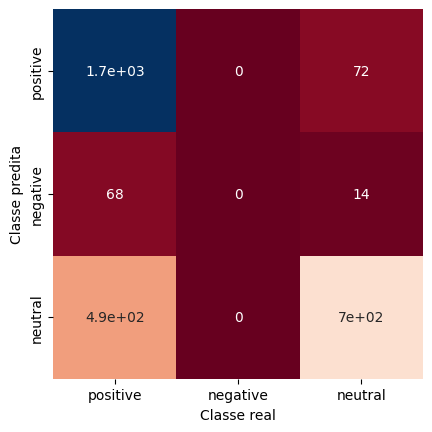

In [29]:
cm = confusion_matrix(categ_tfidfnb2, predictions_tfidfnb2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfnb2.unique(),
            yticklabels= categ_tfidfnb2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---
# BoW + KNN


---
* **KNeighborsClassifier:** é um classificador baseado em aprendizado supervisionado que usa a técnica de K-Vizinhos Mais Próximos (KNN). Ele classifica um ponto de dados com base na classe da maioria dos seus vizinhos mais próximos no espaço de características.
O parâmetro *n_neighbors* define o número de vizinhos a serem considerados na classificação.


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)

In [31]:
vectorizer_bowknn = vectorizer.fit_transform(data_content['content'])

BOWKNN_dataframe=pd.DataFrame(vectorizer_bowknn.toarray(),columns=vectorizer.get_feature_names_out())
BOWKNN_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
txt_bowknn = BOWKNN_dataframe
categ_bowknn = data_content['sentiment']

predictions_bowknn = cross_val_predict(knn, txt_bowknn, categ_bowknn, cv=skf, method='predict')
precision_bowknn, recall_bowknn, f1_bowknn, _ = precision_recall_fscore_support(categ_bowknn, predictions_bowknn, average='macro', zero_division=1)
accuracy_bowknn = accuracy_score(categ_bowknn, predictions_bowknn)

print(classification_report(categ_bowknn, predictions_bowknn, zero_division=1))

result_bowknn  = {
      'Precision':f"{precision_bowknn :.3f}",
      'Recall': f"{recall_bowknn :.3f}",
      'F1-Score': f"{f1_bowknn :.3f}",
      'Accuracy': f"{accuracy_bowknn :.3f}",
}
result_bowknn


              precision    recall  f1-score   support

       anger       0.33      0.63      0.44       743
     disgust       0.42      0.27      0.33       952
        fear       1.00      0.00      0.00        47
   happiness       0.16      0.36      0.22       319
     neutral       0.07      0.20      0.11        82
     sadness       0.59      0.04      0.07       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.30      3011
   macro avg       0.51      0.21      0.17      3011
weighted avg       0.42      0.30      0.26      3011



{'Precision': '0.512',
 'Recall': '0.214',
 'F1-Score': '0.167',
 'Accuracy': '0.297'}

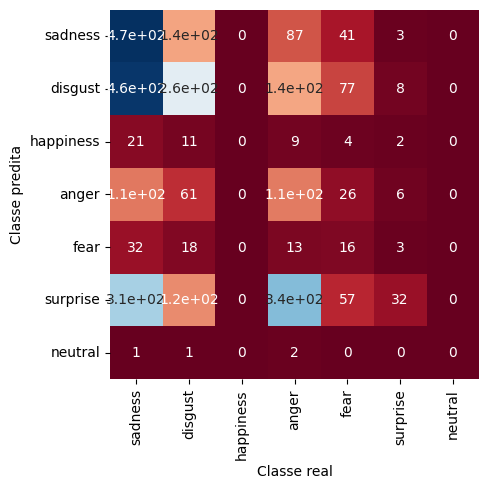

In [33]:
cm = confusion_matrix(categ_bowknn, predictions_bowknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_bowknn.unique(),
            yticklabels= categ_bowknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [34]:
categ_bowknn2 = data_content['sentiment_polarity']

predictions_bowknn2  = cross_val_predict(knn, txt_bowknn, categ_bowknn2, cv=skf, method='predict')
precision_bowknn2, recall_bowknn2, f1_bowknn2, _ = precision_recall_fscore_support(categ_bowknn2, predictions_bowknn2, average='macro', zero_division=1)
accuracy_bowknn2  = accuracy_score(categ_bowknn2, predictions_bowknn2 )

print(classification_report(categ_bowknn2, predictions_bowknn2, zero_division=1))

result_bowknn2 = {
      'Precision':f"{precision_bowknn2:.3f}",
      'Recall': f"{recall_bowknn2:.3f}",
      'F1-Score': f"{f1_bowknn2:.3f}",
      'Accuracy': f"{accuracy_bowknn2:.3f}",
}
result_bowknn2

              precision    recall  f1-score   support

    negative       0.66      0.80      0.72      1742
     neutral       0.09      0.15      0.11        82
    positive       0.64      0.41      0.50      1187

    accuracy                           0.63      3011
   macro avg       0.46      0.45      0.44      3011
weighted avg       0.64      0.63      0.62      3011



{'Precision': '0.462',
 'Recall': '0.453',
 'F1-Score': '0.445',
 'Accuracy': '0.630'}

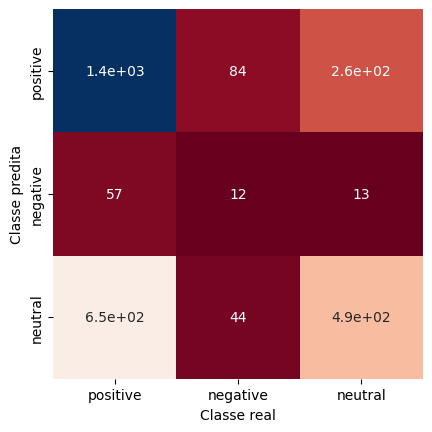

In [35]:
cm = confusion_matrix(categ_bowknn2, predictions_bowknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_bowknn2.unique(),
            yticklabels= categ_bowknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

# TF-IDF + KNN

---



In [36]:
vectorizer_tfidf_knn = tfidf.fit_transform(data_content['content'])

tfidf_knn_dataframe = pd.DataFrame(vectorizer_tfidf_knn.toarray(), columns=tfidf.get_feature_names_out())
tfidf_knn_dataframe

,aap,aba,abaixa,abaixada,abaixado,abaixar,abaixaram,abaixe,abaixei,abaixem,...,últimamente,últimas,último,últimos,única,únicas,único,únicos,úteis,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
txt_tfidfknn = tfidf_knn_dataframe
categ_tfidfknn = data_content['sentiment']

predictions_tfidfknn  = cross_val_predict(knn, txt_tfidfknn, categ_tfidfknn, cv=skf, method='predict')
precision_tfidfknn, recall_tfidfknn , f1_tfidfknn, _ = precision_recall_fscore_support(categ_tfidfknn, predictions_tfidfknn, average='macro', zero_division=1)
accuracy_tfidfknn  = accuracy_score(categ_tfidfknn, predictions_tfidfknn )

print(classification_report(categ_tfidfknn, predictions_tfidfknn, zero_division=1))

result_tfidfknn = {
      'Precision':f"{precision_tfidfknn:.3f}",
      'Recall': f"{recall_tfidfknn:.3f}",
      'F1-Score': f"{f1_tfidfknn:.3f}",
      'Accuracy': f"{accuracy_tfidfknn:.3f}",
}
result_tfidfknn

              precision    recall  f1-score   support

       anger       0.50      0.46      0.48       743
     disgust       0.43      0.66      0.52       952
        fear       0.00      0.00      0.00        47
   happiness       0.54      0.43      0.48       319
     neutral       0.08      0.01      0.02        82
     sadness       0.57      0.39      0.47       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.48      3011
   macro avg       0.45      0.28      0.28      3011
weighted avg       0.48      0.48      0.47      3011



{'Precision': '0.446',
 'Recall': '0.279',
 'F1-Score': '0.281',
 'Accuracy': '0.481'}

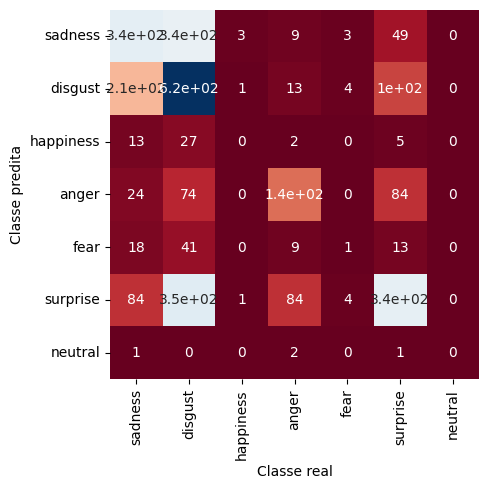

In [38]:
cm = confusion_matrix(categ_tfidfknn, predictions_tfidfknn)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfknn.unique(),
            yticklabels= categ_tfidfknn.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()

In [39]:
categ_tfidfknn2 = data_content['sentiment_polarity']

predictions_tfidfknn2  = cross_val_predict(knn, txt_tfidfknn, categ_tfidfknn2, cv=skf, method='predict')
precision_tfidfknn2, recall_tfidfknn2 , f1_tfidfknn2, _ = precision_recall_fscore_support(categ_tfidfknn2, predictions_tfidfknn2, average='macro', zero_division=1)
accuracy_tfidfknn2  = accuracy_score(categ_tfidfknn2, predictions_tfidfknn2 )

print(classification_report(categ_tfidfknn2, predictions_tfidfknn2, zero_division=1))

result_tfidfknn2 = {
      'Precision':f"{precision_tfidfknn2:.3f}",
      'Recall': f"{recall_tfidfknn2:.3f}",
      'F1-Score': f"{f1_tfidfknn2:.3f}",
      'Accuracy': f"{accuracy_tfidfknn2:.3f}",
}
result_tfidfknn2

              precision    recall  f1-score   support

    negative       0.74      0.89      0.81      1742
     neutral       0.60      0.04      0.07        82
    positive       0.77      0.60      0.67      1187

    accuracy                           0.75      3011
   macro avg       0.70      0.51      0.52      3011
weighted avg       0.75      0.75      0.73      3011



{'Precision': '0.703',
 'Recall': '0.507',
 'F1-Score': '0.516',
 'Accuracy': '0.750'}

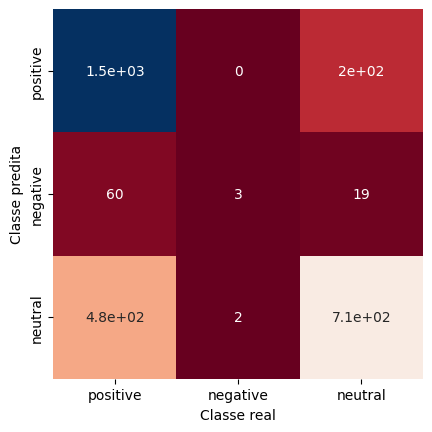

In [40]:
cm = confusion_matrix(categ_tfidfknn2, predictions_tfidfknn2)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
            xticklabels= categ_tfidfknn2.unique(),
            yticklabels= categ_tfidfknn2.unique())

plt.xlabel("Classe real")
plt.ylabel("Classe predita")
plt.show()



---

#Rede neural com embedding

---


**O que são Embeddings?**

Embeddings são representações densas de palavras ou documentos em um espaço vetorial de baixa dimensionalidade.
Eles capturam relações semânticas entre palavras, permitindo que palavras semelhantes fiquem próximas no espaço vetorial.



1.   **Word2Vec:**

Word2Vec é uma técnica baseada em redes neurais para aprender representações de palavras.

Existem duas arquiteturas principais: Continuous Bag of Words (CBOW) e Skip-gram.

**CBOW:** Prediz uma palavra com base no contexto das palavras vizinhas.

**Skip-gram:** Prediz as palavras de contexto dado uma palavra central.

Word2Vec é treinado em grandes volumes de texto e gera embeddings que capturam semântica de maneira eficaz.

2.  **GloVe (Global Vectors for Word Representation)**

Técnica baseada em fatoração de matriz que aprende embeddings a partir da co-ocorrência global de palavras em um corpus.
Diferentemente do Word2Vec, que é baseado em janelas de contexto locais, GloVe utiliza a matriz de co-ocorrência global para aprender as representações das palavras.

GloVe é conhecido por gerar embeddings de alta qualidade que capturam relações semânticas e sintáticas.

3. **Doc2Vec**

É uma extensão do Word2Vec que aprende representações vetoriais para documentos inteiros, além de palavras.

Existem duas variantes principais:

**Distributed Memory (DM):** Funciona de maneira similar ao CBOW, mas adiciona um vetor de documento ao contexto.

**Distributed Bag of Words (DBOW):** Funciona de maneira similar ao Skip-gram, mas treina um vetor de documento para predizer palavras no documento.

Doc2Vec é útil quando precisamos de embeddings para documentos, não apenas palavras.






---


#Escolhido: Word2Vec

---


Pois é ideal para capturar o significado das palavras com base no contexto imediato, o que é importante para entender a linguagem coloquial e as nuances dos comentários dos usuários. E, além de que, pode identificar relações entre palavras, o que ajuda a detectar sentimentos e emoções subjacentes em comentários de usuários.

In [41]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [42]:
data_content3 = pd.DataFrame(data_content)
data_content3['tokens'] = data_content3['content'].apply(lambda x: word_tokenize(x.lower()))
data_content3

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,tokens
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,positive,sadness,NaN,"[app, shopee, razoável, apesar, fácil, utiliza..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,positive,sadness,NaN,"[app, bem, otimizado, fácil, visualizar, produ..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,positive,sadness,NaN,"[app, bom, prático, fácil, entender, porém, al..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,positive,sadness,NaN,"[aplicativo, bom, algo, chateou, bastante, fat..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,negative,disgust,NaN,"[app, bom, porém, tido, dificuldades, pagament..."
...,...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,negative,disgust,NaN,"[funciona, reconhimento, facial, diz, nenhum, ..."
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,negative,disgust,NaN,"[experiência, app, sendo, boa, precisa, aprimo..."
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,negative,disgust,NaN,"[consigo, logar, jeito, nenhum, código, valida..."
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,negative,disgust,NaN,"[funcionava, ultima, atualização, algum, motiv..."


Explicando os parâmetros de Word2Vec:
 - Pode ser treinado de duas maneiras: CBOW e SKIP-GRAM
    - **CBOW (continuous bag-of-words ):**  é uma rede neural que prediz a palavra dado um contexto, sendo o contexto interpretado como uma sentença. Este modelo pode prever tanto palavras prévias como posteriores em um contexto.
    - **Skip-Gram:** desempenha uma função inversa do apresentado em CBOW, ou seja, dado uma palavra prediz calculando as palavras mais prováveis ao contexto.

*  **sg:** é 1 para o skip-gram e 0 caso utilizar o CBOW

*  **window:** O tamanho da janela especifica quantas palavras ao redor da palavra-alvo são consideradas como contexto. Ou seja, quantas palavras que será considerada antes e depois.
  * **CBOW (Continuous Bag of Words):**  a janela de contexto é usada para prever a palavra-alvo. Por exemplo, se a palavra-alvo é "ótimo" e a janela é de tamanho 5, o modelo usará as 5 palavras anteriores e as 5 palavras seguintes para prever "ótimo".

  * **Skip-gram:** a palavra-alvo é usada para prever as palavras de contexto. Se a janela é de tamanho 5, a palavra-alvo será usada para prever as 5 palavras anteriores e as 5 palavras seguintes.

* **vector-size:** tamanho do vetor de palavras com valor de 300, esse valor baseado aos modelos CBOW  SKIP-GRAM com 300 dimensões.

* **min-count:** Define o limite mínimo de frequência das palavras. Palavras que ocorrem com menos frequência que min_count serão ignoradas.

* **alpha e min-alpha:**  Define a taxa de aprendizado inicial e final para o treinamento.
---
 * **Taxa de Aprendizado:** controla a rapidez com que o modelo ajusta seus pesos durante o treinamento, diminuindo gradualmente, pois o ideal é começar com uma taxa alta para realizar ajustes grandes no início do treinamento e ir reduzindo para ajustes mais precisos.
---
* **build_vocab:** Constrói o vocabulário a partir das tokens fornecidos.
* **train:** Treina o modelo com os tokens fornecidos, ajustando a taxa de aprendizado ao longo do treinamento.
 * **start_alpha e end_alpha:** define a taxa de aprendizado inicial e final.
 * **total_examples=model_w2v.corpus_count:**m Indica o número total de exemplos (ou frases/sentenças) no corpus. Esse valor é usado para ajustar o treinamento com base no tamanho do corpus. model_w2v.corpus_count deve ser o número total de sentenças ou documentos no seu conjunto de dados.
  * **epochs:** Define o número de passagens completas pelo corpus durante o treinamento. Cada passagem completa é chamada de época. O treinamento será repetido por 20 épocas, onde foi identificado que até 30 os valores de validação se estabilizaram.

In [43]:
model_w2v = Word2Vec(sentences = data_content3['tokens'], sg=0, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

model_w2v.build_vocab(data_content3['tokens'], update=True)
model_w2v.train(data_content3['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=20)

model_w2v.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v.txt', binary=False)
model_w2v.save("/content/drive/MyDrive/Colab Notebooks/word2vec.model")


In [44]:
model = model_w2v.wv.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v.txt', binary=False)

word_vector = model['bom']
print(word_vector)

[-0.17730957 -0.4846982  -0.3315409  -0.26836213  0.19429469 -0.0894025
  0.00551679  0.28811654 -0.21948592 -0.24268557  0.6835803  -0.08955665
 -0.28383595  0.2374119   0.38921025  0.305043    0.4574914  -0.6379039
  0.53905016 -0.05008576  0.46067637  0.42813465 -0.06252835 -0.18234135
 -0.24868469  0.34287038 -0.104151    0.07284547  0.19540048 -0.08068478
  0.5983207  -0.41227475  0.71101743 -0.152534   -0.04905564  0.26274613
  0.2612392  -0.33701915  0.17018217 -0.05227554 -0.15010859  0.38052323
 -0.41238368 -0.19011098 -0.04256049 -0.04924072  0.00779436  0.42496663
  0.5391689   0.22456513  0.6895511   0.21866804 -0.6682949   1.099439
  0.04121319  0.6195764  -0.28619772 -0.00743164 -0.08115863 -0.06034507
 -0.00635664  0.0081586   0.07981113 -0.04582158  0.11887892  0.03225369
 -0.2968398  -0.86991125 -0.07313524  0.09535293  0.4070374   0.36314923
 -0.44620195 -0.5294578  -0.38498598 -0.40754515 -0.06773043  0.18726274
 -0.32331318  0.1919417   0.26708212  0.00745071 -0.006

In [45]:
model.most_similar('bom')

[('ótimo', 0.7645753622055054),
 ('maravilhoso', 0.7006396651268005),
 ('top', 0.6438997387886047),
 ('otimo', 0.643047571182251),
 ('amo', 0.6246299147605896),
 ('perfeito', 0.6222931146621704),
 ('si', 0.6181206703186035),
 ('antigamente', 0.6175456047058105),
 ('adoro', 0.587949812412262),
 ('legal', 0.5868755578994751)]

In [46]:
model.most_similar('ruim')

[('horrível', 0.6262620687484741),
 ('difícil', 0.6034473180770874),
 ('mudando', 0.578831136226654),
 ('gravando', 0.5522683262825012),
 ('mano', 0.5222333073616028),
 ('atualiza', 0.518356442451477),
 ('complicado', 0.5146292448043823),
 ('antigo', 0.5028355717658997),
 ('entra', 0.5001614093780518),
 ('lixo', 0.49026912450790405)]

* **get_embedding_w2v:** é usada para calcular a média dos vetores de palavras para um conjunto de tokens (palavras) usando um modelo Word2Vec.
  * **valid_words = [word for word in tokens if word in model_w2v]** ➡  filtra as palavras da lista de tokens, mantendo apenas aquelas que estão presentes no vocabulário do modelo Word2Vec (model_w2v).
  * **np.mean([model_w2v[word] for word in valid_words], axis=0)** ➡ se houver palavras válidas, calcula-se a média dos vetores dessas palavras. A média é calculada ao longo do eixo 0, resultando em um vetor de mesma dimensão que os vetores de palavras.

In [47]:
tokens = data_content3['tokens']

def get_embedding_w2v(tokens, model_w2v ):
    valid_words = [word for word in tokens if word in model]
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)
    else:
        return np.zeros(300)

data_content3['embedding_cbow'] = data_content3['tokens'].apply(lambda x: get_embedding_w2v(x, model_w2v ))
data_content3.to_csv('/content/drive/MyDrive/Colab Notebooks/data_content3.csv', index=False)
data_content3.loc[0, 'embedding_cbow']

array([ 1.16345182e-01,  3.15274239e-01, -1.68572500e-01,  2.57796496e-01,
       -7.13778958e-02, -2.88224638e-01,  5.45017906e-02,  2.00409979e-01,
        2.03879997e-01,  1.20442480e-01,  2.21426219e-01, -1.67806700e-01,
        2.70977944e-01,  1.98686153e-01, -1.31694153e-01, -5.32263182e-02,
        1.53887868e-01, -9.52133462e-02,  6.39260933e-02, -1.97498761e-02,
       -3.10964752e-02, -3.73963616e-03,  1.50623977e-01, -9.01454240e-02,
        2.98142016e-01, -1.35399073e-01, -3.91665250e-02,  2.82899402e-02,
       -2.77814776e-01, -5.07978089e-02,  2.43865512e-02, -1.10289536e-01,
       -5.36898673e-02,  5.55681214e-02, -1.90649182e-02, -4.99973912e-03,
       -7.12059997e-03, -5.11592552e-02,  1.23790307e-02, -9.73431841e-02,
        2.98923682e-02, -5.80692925e-02, -3.89185362e-02,  4.86750044e-02,
        8.46450925e-02,  1.53423950e-01,  1.22560956e-01, -5.49740493e-02,
       -1.22456849e-01,  1.92478430e-02, -1.27147645e-01,  1.24673627e-01,
       -1.61459535e-01, -

* **classifiers_result:** avalia vários classificadores usando validação cruzada estratificada, calcula métricas de desempenho (precisão, recall, F1-score e acurácia) e imprime relatórios de classificação. Além disso, retorna uma lista de dicionários com os resultados de cada classificador.

In [48]:
def classifiers_result(X, y, classifiers, skf):
    results = []
    for name, clf in classifiers.items():
        y_pred = cross_val_predict(clf, X, y, cv=skf, method='predict')

        precision, recall, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro', zero_division=1)
        accuracy = accuracy_score(y, y_pred)

        result = {
            'Classifier': name,
            'Precision': f"{precision:.3f}",
            'Recall': f"{recall:.3f}",
            'F1-Score': f"{f1:.3f}",
            'Accuracy': f"{accuracy:.3f}"
        }
        results.append(result)

        print(f"{name}:")
        print(classification_report(y, y_pred, zero_division=1))
        print(f"Accuracy: {accuracy:.4f}\n")

    return results

In [49]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gaussian - Naive Bayes": GaussianNB()
}

In [50]:
X_w2v = np.vstack(data_content3['embedding_cbow'].values)
y_w2v = data_content3['sentiment']


print("Sentiment Classification:")
results_sentiment = classifiers_result(X_w2v, y_w2v, classifiers, skf)


best_classifier_sentiment = max(results_sentiment, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best Sentiment Classifier: {best_classifier_sentiment}\n")

results_sentiment_w2v = pd.DataFrame(results_sentiment)
results_sentiment_w2v

Sentiment Classification:
Logistic Regression:
              precision    recall  f1-score   support

       anger       0.61      0.54      0.57       743
     disgust       0.58      0.65      0.61       952
        fear       0.50      0.02      0.04        47
   happiness       0.66      0.56      0.61       319
     neutral       0.48      0.15      0.22        82
     sadness       0.64      0.72      0.67       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.61      3011
   macro avg       0.64      0.38      0.39      3011
weighted avg       0.61      0.61      0.60      3011

Accuracy: 0.6098

SVM:
              precision    recall  f1-score   support

       anger       0.61      0.56      0.58       743
     disgust       0.58      0.66      0.62       952
        fear       1.00      0.00      0.00        47
   happiness       0.65      0.58      0.61       319
     neutral       0.46      0.07      0.13        82
     sad

,Classifier,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.637,0.377,0.390,0.610
1,SVM,0.709,0.370,0.375,0.617
2,KNN,0.493,0.310,0.314,0.518
3,Gaussian - Naive Bayes,0.492,0.393,0.322,0.446


In [51]:
X_w2v1 = np.vstack(data_content3['embedding_cbow'].values)
y_w2v1 = data_content3['sentiment_polarity']

print("Sentiment polarity Classification:")
results_sp = classifiers_result(X_w2v1, y_w2v1, classifiers, skf)


best_classifier_sp = max(results_sp, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sp Classifier: {best_classifier_sp}\n")

results_sentiment_polarity_w2v = pd.DataFrame(results_sp)
results_sentiment_polarity_w2v


Sentiment polarity Classification:
Logistic Regression:
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1742
     neutral       0.50      0.09      0.15        82
    positive       0.81      0.80      0.80      1187

    accuracy                           0.83      3011
   macro avg       0.72      0.59      0.60      3011
weighted avg       0.82      0.83      0.82      3011

Accuracy: 0.8273

SVM:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      1742
     neutral       1.00      0.04      0.07        82
    positive       0.81      0.80      0.80      1187

    accuracy                           0.83      3011
   macro avg       0.88      0.57      0.58      3011
weighted avg       0.83      0.83      0.82      3011

Accuracy: 0.8280

KNN:
              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1742
     neutral       0.50    

,Classifier,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.717,0.588,0.603,0.827
1,SVM,0.883,0.573,0.579,0.828
2,KNN,0.681,0.528,0.526,0.776
3,Gaussian - Naive Bayes,0.557,0.629,0.559,0.712


---
# Word2Vec utilizando o algoritmo Skip-gram

---


In [52]:
model_w2v_sg = Word2Vec(sentences = data_content3['tokens'], sg=1, vector_size = 300, window = 5, min_count=5, alpha=0.025, min_alpha=0.007)

model_w2v_sg.build_vocab(data_content3['tokens'], update=True)
model_w2v_sg.train(data_content3['tokens'],start_alpha=0.025, end_alpha=0.007, total_examples=model_w2v.corpus_count, epochs=30)
model_w2v.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v_sg.txt', binary=False)

In [53]:
model_w2v_sg.wv.most_similar('bom')

[('ótimas', 0.35007110238075256),
 ('amando', 0.34815365076065063),
 ('ótimo', 0.34023982286453247),
 ('apresentações', 0.33944466710090637),
 ('físicos', 0.3351682722568512),
 ('motion', 0.33402255177497864),
 ('edits', 0.3332712650299072),
 ('incomodando', 0.32777974009513855),
 ('rapido', 0.32740238308906555),
 ('mt', 0.32732075452804565)]

In [54]:
model_w2v_sg.wv.most_similar('ruim')

[('abaixei', 0.3152424693107605),
 ('gravando', 0.30627453327178955),
 ('achando', 0.3043113946914673),
 ('limpando', 0.2932395339012146),
 ('ficou', 0.2900211811065674),
 ('virus', 0.28373846411705017),
 ('baixou', 0.2603739798069),
 ('instável', 0.2568000257015228),
 ('instalem', 0.25545990467071533),
 ('revejam', 0.2553652822971344)]

In [55]:
data_content3['embedding_sg'] = data_content3['tokens'].apply(lambda x: get_embedding_w2v(x, model_w2v ))
data_content3.to_csv('data_content3.csv', index=False)
data_content3.loc[0, 'embedding_sg']

X_sg = np.vstack(data_content3['embedding_sg'].values)
y_sg = data_content3['sentiment']

print("Sentiment Classification Skip-Gram:")
results_sentiment_sg = classifiers_result(X_sg , y_sg , classifiers, skf)


best_classifier_sentiment_sg = max(results_sentiment_sg, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sentiment_sg Classifier: {best_classifier_sentiment_sg}\n")

results_sentiment_sg_w2v = pd.DataFrame(results_sentiment_sg)
results_sentiment_sg_w2v

Sentiment Classification Skip-Gram:
Logistic Regression:
              precision    recall  f1-score   support

       anger       0.61      0.54      0.57       743
     disgust       0.58      0.65      0.61       952
        fear       0.50      0.02      0.04        47
   happiness       0.66      0.56      0.61       319
     neutral       0.48      0.15      0.22        82
     sadness       0.64      0.72      0.67       864
    surprise       1.00      0.00      0.00         4

    accuracy                           0.61      3011
   macro avg       0.64      0.38      0.39      3011
weighted avg       0.61      0.61      0.60      3011

Accuracy: 0.6098

SVM:
              precision    recall  f1-score   support

       anger       0.61      0.56      0.58       743
     disgust       0.58      0.66      0.62       952
        fear       1.00      0.00      0.00        47
   happiness       0.65      0.58      0.61       319
     neutral       0.46      0.07      0.13        8

,Classifier,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.637,0.377,0.390,0.610
1,SVM,0.709,0.370,0.375,0.617
2,KNN,0.493,0.310,0.314,0.518
3,Gaussian - Naive Bayes,0.492,0.393,0.322,0.446


In [56]:
X_sg1 = np.vstack(data_content3['embedding_sg'].values)
y_sg1 = data_content3['sentiment_polarity']

print("Sentiment Classification Skip-Gram:")
results_sentiment_polarity_sg = classifiers_result(X_sg1, y_sg1, classifiers, skf)


best_classifier_sentiment_polarity_sg = max(results_sentiment_polarity_sg, key=lambda x: float(x['Accuracy']))['Classifier']
print(f"Best sentiment_polarity Classifier: {best_classifier_sentiment_polarity_sg}\n")

results_sentiment_polarity_sg_w2v = pd.DataFrame(results_sentiment_polarity_sg)
results_sentiment_polarity_sg_w2v



Sentiment Classification Skip-Gram:
Logistic Regression:
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      1742
     neutral       0.50      0.09      0.15        82
    positive       0.81      0.80      0.80      1187

    accuracy                           0.83      3011
   macro avg       0.72      0.59      0.60      3011
weighted avg       0.82      0.83      0.82      3011

Accuracy: 0.8273

SVM:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.86      1742
     neutral       1.00      0.04      0.07        82
    positive       0.81      0.80      0.80      1187

    accuracy                           0.83      3011
   macro avg       0.88      0.57      0.58      3011
weighted avg       0.83      0.83      0.82      3011

Accuracy: 0.8280

KNN:
              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1742
     neutral       0.50   

,Classifier,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.717,0.588,0.603,0.827
1,SVM,0.883,0.573,0.579,0.828
2,KNN,0.681,0.528,0.526,0.776
3,Gaussian - Naive Bayes,0.557,0.629,0.559,0.712


---
#BERTimbau

---

 O modelo utilizado é o **neuralmind/bert-base-portuguese-cased**, que é um modelo BERT treinado com dados em português.

* **AutoTokenizer:** Carrega o tokenizador associado ao modelo BERT pré-treinado. O tokenizador converte o texto em tokens.

* **AutoModel:** Carrega o modelo BERT pré-treinado para codificar os textos.

* **word_embedding_model:** Cria um modelo de embeddings baseado no Transformer. Este modelo é responsável por gerar embeddings (representações vetoriais) para as palavras ou frases. Utiliza o modelo BERT que foi carregado anteriormente.

* **pooling_model:** Cria um modelo de pooling que transforma a sequência de embeddings em um único vetor de representação. O pooling combina as representações das palavras geradas pelo word_embedding_model em uma única representação para a frase. O get_word_embedding_dimension() fornece a dimensão dos embeddings que o pooling deve considerar.

* **SentenceTransformer:** este modelo é projetado para gerar embeddings para frases completas.

 Motivos da escolha do modelo neuralmind/bert-base-portuguese-cased:

   * Este modelo foi treinado especificamente em textos em português. Isso significa que ele é otimizado para compreender e gerar representações para o idioma português, capturando nuances linguísticas e contextuais que são específicas para o idioma.
  
   * Modelos treinados em um idioma específico geralmente lidam melhor com as particularidades gramaticais, sintáticas e semânticas desse idioma.
  
  * O BERT (Bidirectional Encoder Representations from Transformers) é um modelo que considera o contexto de uma palavra tanto à esquerda quanto à direita para criar embeddings contextuais. Isso melhora a compreensão do significado das palavras em diferentes contextos.
  
  * Cased: O modelo cased preserva a capitalização das palavras, o que é importante para idiomas como o português, onde a capitalização pode mudar o significado ou a gramática (por exemplo, "Banco" vs. "banco").
  
  *  Modelos baseados em BERT têm se mostrado altamente eficazes em diversas tarefas de PLN, como análise de sentimentos, reconhecimento de entidades nomeadas, e mais. Tendo uma alta performance.

  * Modelo de Código Aberto e está disponível na Hugging Face Model Hub, o que facilita o acesso e a integração com outras ferramentas e bibliotecas de PLN.


In [57]:
#!pip uninstall -y transformers
!pip install transformers
!pip install datasets

In [58]:
import os
import torch
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset
from sklearn.preprocessing import LabelEncoder

Preparação dos dados para um modelo de classificação de texto usando BERT:
  * A nova coluna stratify_col é criada combinando as colunas sentiment_binary e sp_ordinal em tuplas. Isso é útil para garantir que a estratificação durante a validação cruzada ou divisão do conjunto de dados mantenha a proporção de rótulos.

In [65]:
path_bert = '/content/drive/MyDrive/Colab Notebooks/bert-base-portuguese-cased'
data_content3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_content3.csv')

label_encoder_sentiment = LabelEncoder()

data_content3['sentiment'] = label_encoder_sentiment.fit_transform(data_content3['sentiment'])



In [66]:
ordinal_encoder_sentiment_polarity = OrdinalEncoder()

data_content3['sentiment_polarity'] = ordinal_encoder_sentiment_polarity.fit_transform(data_content3[['sentiment_polarity']])
data_content3['sentiment_polarity'] = data_content3['sentiment_polarity'].astype(int)

data_content3['stratify_col'] = data_content3[['sentiment', 'sentiment_polarity']].apply(tuple, axis=1)
data_content3.head(20)


,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,tokens,embedding_cbow,stratify_col
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,2,5,NaN,"['app', 'shopee', 'razoável', 'apesar', 'fácil...",[ 1.16345182e-01 3.15274239e-01 -1.68572500e-...,"(5, 2)"
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,2,5,NaN,"['app', 'bem', 'otimizado', 'fácil', 'visualiz...",[-4.35842015e-02 2.19296888e-01 -1.49716571e-...,"(5, 2)"
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,2,5,NaN,"['app', 'bom', 'prático', 'fácil', 'entender',...",[-3.52608263e-02 1.21174127e-01 -2.04368547e-...,"(5, 2)"
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,2,5,NaN,"['aplicativo', 'bom', 'algo', 'chateou', 'bast...",[ 0.00827023 0.38481736 -0.0649949 0.507295...,"(5, 2)"
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,0,1,NaN,"['app', 'bom', 'porém', 'tido', 'dificuldades'...",[ 0.00143575 0.3273828 0.12060653 0.002119...,"(1, 0)"
5,2ce2db50-eec3-4cf5-afd6-b153ca01cf0f,Shopee,bom app porém fica travando pouco hora conclui...,2,3,NaN,"['bom', 'app', 'porém', 'fica', 'travando', 'p...",[ 0.04179832 0.0433053 0.03036854 -0.001812...,"(3, 2)"
6,404d8ede-bf3e-4652-a410-ec1ad12e40df,Shopee,gostado bastante app acredito decorrência atua...,2,3,NaN,"['gostado', 'bastante', 'app', 'acredito', 'de...",[-0.06366311 0.30442092 -0.15781277 0.227045...,"(3, 2)"
7,0d7c4353-a8f6-467c-abd7-c65b26fd4976,Shopee,adoro tudo pensar promoções frete diferencial ...,2,3,NaN,"['adoro', 'tudo', 'pensar', 'promoções', 'fret...",[-0.01371358 0.29594237 -0.05519907 0.300010...,"(3, 2)"
8,5410fc9e-d51f-4f6f-9fdc-01b93eed8750,Shopee,app bom algumas mercadorias realmente qualidad...,2,5,NaN,"['app', 'bom', 'algumas', 'mercadorias', 'real...",[-2.73219906e-02 2.40753621e-01 -6.64730817e-...,"(5, 2)"
9,31458c8f-8f11-496f-b72e-dacc9470a52f,Shopee,problema inicial conseguir enviar mensagens ch...,0,0,NaN,"['problema', 'inicial', 'conseguir', 'enviar',...",[ 3.05495579e-02 3.96667391e-01 7.30891898e-...,"(0, 0)"


* **train_test_split** para dividir o data_content2 em conjuntos de treinamento e teste. A divisão é feita com 20% dos dados reservados para teste e garante a estratificação com base na coluna stratify_col.
* São criados objetos Dataset, para serem usados para manipulação e preparação de dados em projetos com Transformers.
* tokenizer carrega um tokenizador pré-treinado para o modelo BERT a partir do diretório local, assim como o model.
* **BertForSequenceClassification:** é um modelo BERT (Bidirectional Encoder Representations from Transformers) ajustado para tarefas de classificação de sequência. Os resultados produzidos pelo modelo são logits, que representam valores para cada classe.


* **preprocess_function():** Esta função é usada em um pipeline de preparação de dados, onde os dados são carregados e passados para essa função para serem preparados antes do treinamento ou da avaliação do modelo.

* Tabém é realizada a conversão dos dados para tensores PyTorch, o que facilita a integração com o modelo BERT para treinamento e avaliação.

* **Tensores:** são uma generalização de vetores e matrizes para mais de duas dimensões e são a estrutura de dados fundamental em muitas bibliotecas de aprendizado de máquina e computação científica, como PyTorch e TensorFlow. Eles são usados para armazenar e manipular dados numéricos em várias dimensões.

In [67]:
train_df, test_df = train_test_split(data_content3, test_size=0.2, random_state=42, stratify=data_content3['sentiment'])

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)


tokenizer_sentiment = BertTokenizer.from_pretrained(path_bert)
model_sentiment = BertForSequenceClassification.from_pretrained(path_bert, num_labels=len(label_encoder_sentiment.classes_))


def preprocess_function(examples):
    examples['content'] = [str(text) for text in examples['content']]
    return tokenizer_sentiment(examples['content'], truncation=True, padding='max_length', max_length=128)

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment'], output_all_columns=True)

# Renomear 'sentiment' para 'labels'
train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

In [68]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted', zero_division=1)
    accuracy = accuracy_score(labels, predictions)

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
    }

In [69]:
# Definir os argumentos de treinamento
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Colab Notebooks/results_sentiment',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Treinador
trainer_sentiment = Trainer(
    model=model_sentiment,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Treinando o modelo
trainer_sentiment.train()

# Avaliando
evaluation_metrics_sentiment = trainer_sentiment.evaluate()

# Salvando o modelo
model_sentiment.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_sentiment")
tokenizer_sentiment.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_sentiment")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1-score
1,No log,0.810974,0.726368,0.740586,0.726368,0.709894
2,0.957100,0.786820,0.711443,0.730821,0.711443,0.697913
3,0.957100,0.828919,0.723051,0.713753,0.723051,0.708677


('/content/drive/MyDrive/Colab Notebooks/results_sentiment/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/results_sentiment/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/results_sentiment/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/results_sentiment/added_tokens.json')


A função abaixo extrai embeddings (representações vetoriais) de BERT para uma lista de textos. Recebe o tokenizer, o model, o tamanho do lote batch_size e o comprimento máximo de sequência max_length como parâmetros.
Explicação de cada parte dessa função:

* Cria uma lista para armazenar todos os embeddings extraídos.

* Itera sobre os textos em lotes de tamanho batch_size. Isso é feito para evitar sobrecarregar a memória.

* Extrai o lote atual de textos.

* Converte cada texto para uma string, garantindo que todos os elementos sejam tratados como texto.

* Usa o tokenizer para converter os textos em tensores que o modelo BERT pode processar. Os parâmetros padding=True e truncation=True garantem que todas as sequências tenham o mesmo comprimento.

* Desativa o cálculo dos gradientes, o que é útil para a inferência e economiza memória.

* Passa os tensores de entrada pelo modelo BERT e obtém os outputs.

* Extrai os embeddings da última camada e seleciona o embedding do primeiro token de cada sequência, que é frequentemente usado para representar o texto inteiro. Converte os embeddings para um array NumPy.

* Adiciona os embeddings do lote atual à lista all_embeddings.

* Retorna todos os embeddings como um array NumPy.

In [70]:
# Codificar os rótulos de polaridade
ordinal_encoder_sentiment_polarity = OrdinalEncoder()
data_content3['sentiment_polarity'] = ordinal_encoder_sentiment_polarity.fit_transform(data_content3[['sentiment_polarity']])
data_content3['sentiment_polarity'] = data_content3['sentiment_polarity'].astype(int)

# Dividir em treino e teste
train_df_polarity, test_df_polarity = train_test_split(data_content3, test_size=0.2, random_state=42, stratify=data_content3['sentiment_polarity'])

# Converter para Dataset do HuggingFace
train_dataset_polarity = Dataset.from_pandas(train_df_polarity)
test_dataset_polarity = Dataset.from_pandas(test_df_polarity)

# Carregar o tokenizer e o modelo BERTimbau
model_polarity = BertForSequenceClassification.from_pretrained(path_bert, num_labels=3)  # Assumindo 3 classes para polaridade

# Preprocessamento de dados
train_dataset_polarity = train_dataset_polarity.map(preprocess_function, batched=True)
test_dataset_polarity = test_dataset_polarity.map(preprocess_function, batched=True)

train_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])
test_dataset_polarity.set_format(type='torch', columns=['input_ids', 'attention_mask', 'sentiment_polarity'])

train_dataset_polarity = train_dataset_polarity.rename_column('sentiment_polarity', 'labels')
test_dataset_polarity = test_dataset_polarity.rename_column('sentiment_polarity', 'labels')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

In [71]:
# Definir os argumentos de treinamento
training_args_polarity = TrainingArguments(
    output_dir='/content/drive/MyDrive/Colab Notebooks/results_polarity',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Treinador para polaridade
trainer_polarity = Trainer(
    model=model_polarity,
    args=training_args_polarity,
    train_dataset=train_dataset_polarity,
    eval_dataset=test_dataset_polarity,
    compute_metrics=compute_metrics
)

# Treinando o modelo de polaridade
trainer_polarity.train()

# Avaliando
evaluation_metrics_polarity = trainer_polarity.evaluate()

# Salvando o modelo de polaridade
model_polarity.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_polarity")
tokenizer_sentiment.save_pretrained("/content/drive/MyDrive/Colab Notebooks/results_polarity")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1-score
1,No log,0.701571,0.774461,0.827831,0.774461,0.764830
2,0.432500,0.463257,0.872305,0.865527,0.872305,0.863737
3,0.432500,0.550715,0.873964,0.870063,0.873964,0.868811


('/content/drive/MyDrive/Colab Notebooks/results_polarity/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/results_polarity/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/results_polarity/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/results_polarity/added_tokens.json')

In [72]:
def get_embeddings(texts, tokenizer, model, batch_size=32, max_length=128):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        batch_texts = [str(text) for text in batch_texts]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.hidden_states[-1][:, 0, :].numpy()
        all_embeddings.extend(embeddings)
    return np.array(all_embeddings)


In [73]:
model_sentiment_result = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_sentiment", output_hidden_states=True)
tokenizer_sentiment_result = BertTokenizer.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_sentiment")

X_sentiment = get_embeddings(data_content3['content'].tolist(), tokenizer_sentiment_result, model_sentiment_result)
y_sentiment = data_content3['sentiment'].values

print("Embeddings shape:", X_sentiment.shape)
print("Labels shape:", y_sentiment.shape)

Embeddings shape: (3011, 768)
Labels shape: (3011,)


In [74]:
model_polarity_result = BertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_polarity", output_hidden_states=True)
tokenizer_polarity_result = BertTokenizer.from_pretrained("/content/drive/MyDrive/Colab Notebooks/results_polarity")

X_polarity = get_embeddings(data_content3['content'].tolist(), tokenizer_polarity_result, model_polarity_result)
y_polarity = data_content3['sentiment_polarity'].values

print("Embeddings shape:", X_polarity.shape)
print("Labels shape:", y_polarity.shape)

Embeddings shape: (3011, 768)
Labels shape: (3011,)


---
#Análise dos resultados obtidos
---

In [75]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["sentiment", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR", "Word2Vec-SG - LR", "Bertimbau"]

table.add_row(["Precision", result_bownb['Precision'],  result_bowknn['Precision'],   result_tfidfnb['Precision'],  result_tfidfknn['Precision'],  results_sentiment_w2v.iloc[0,1],   results_sentiment_sg_w2v.iloc[0,1],f"{evaluation_metrics_sentiment['eval_Precision']:.3f}"])
table.add_row(["Recall",    result_bownb['Recall'],     result_bowknn['Recall'],      result_tfidfnb['Recall'],     result_tfidfknn['Recall'],     results_sentiment_w2v.iloc[0,2],   results_sentiment_sg_w2v.iloc[0,2],f"{evaluation_metrics_sentiment['eval_Recall']:.3f}"])
table.add_row(["F1-Score",  result_bownb['F1-Score'],   result_bowknn['F1-Score'],    result_tfidfnb['F1-Score'],   result_tfidfknn['F1-Score'],   results_sentiment_w2v.iloc[0,3],   results_sentiment_sg_w2v.iloc[0,3],f"{evaluation_metrics_sentiment['eval_F1-Score']:.3f}"])
table.add_row(["Accuracy",  result_bownb['Accuracy'],   result_bowknn['Accuracy'],    result_tfidfnb['Accuracy'],   result_tfidfknn['Accuracy'],   results_sentiment_w2v.iloc[0,4],   results_sentiment_sg_w2v.iloc[0,4],f"{evaluation_metrics_sentiment['eval_Accuracy']:.3f}"])

print(table)
print()


table2 = PrettyTable()
table2.field_names = ["sentiment_polarity", "BOW+NB", "BOW+KNN", "TF-IDF+NB", "TF-IDF+KNN","Word2Vec-CBOW - LR ", "Word2Vec-SG - LR","Bertimbau"]
table2.add_row(["Precision", result_bownb1['Precision'],  result_bowknn2['Precision'],   result_tfidfnb2['Precision'],  result_tfidfknn2['Precision'],  results_sentiment_polarity_w2v.iloc[0,1],   results_sentiment_polarity_sg_w2v.iloc[0,1],f"{evaluation_metrics_polarity['eval_Precision']:.3f}"])
table2.add_row(["Recall",    result_bownb1['Recall'],     result_bowknn2['Recall'],      result_tfidfnb2['Recall'],     result_tfidfknn2['Recall'],     results_sentiment_polarity_w2v.iloc[0,2],   results_sentiment_polarity_sg_w2v.iloc[0,2],f"{evaluation_metrics_polarity['eval_Recall']:.3f}"])
table2.add_row(["F1-Score",  result_bownb1['F1-Score'],   result_bowknn2['F1-Score'],    result_tfidfnb2['F1-Score'],   result_tfidfknn2['F1-Score'],   results_sentiment_polarity_w2v.iloc[0,3],   results_sentiment_polarity_sg_w2v.iloc[0,3],f"{evaluation_metrics_polarity['eval_F1-Score']:.3f}"])
table2.add_row(["Accuracy",  result_bownb1['Accuracy'],   result_bowknn2['Accuracy'],    result_tfidfnb2['Accuracy'],   result_tfidfknn2['Accuracy'],   results_sentiment_polarity_w2v.iloc[0,4],   results_sentiment_polarity_sg_w2v.iloc[0,4],f"{evaluation_metrics_polarity['eval_Accuracy']:.3f}"])

print(table2)



+-----------+--------+---------+-----------+------------+--------------------+------------------+-----------+
| sentiment | BOW+NB | BOW+KNN | TF-IDF+NB | TF-IDF+KNN | Word2Vec-CBOW - LR | Word2Vec-SG - LR | Bertimbau |
+-----------+--------+---------+-----------+------------+--------------------+------------------+-----------+
| Precision | 0.719  |  0.512  |   0.822   |   0.446    |       0.637        |      0.637       |   0.714   |
|   Recall  | 0.329  |  0.214  |   0.260   |   0.279    |       0.377        |      0.377       |   0.723   |
|  F1-Score | 0.335  |  0.167  |   0.237   |   0.281    |       0.390        |      0.390       |   0.709   |
|  Accuracy | 0.590  |  0.297  |   0.532   |   0.481    |       0.610        |      0.610       |   0.723   |
+-----------+--------+---------+-----------+------------+--------------------+------------------+-----------+

+--------------------+--------+---------+-----------+------------+---------------------+------------------+-----------+

# **Análise Detalhada**



 * #  Sentiment:
  * **Precision:** O método TF-IDF+NB apresenta a maior precisão (0.822), seguido BOW+NB (0.719) e por Bertimbau (0.714).
  * **Recall:** Embora a maioria dos valores de recall seja relativamente baixa, Bertimbau apresenta o maior valor (0.723).
  * **F1-Score:** O método Bertimbau se destaca com o maior F1-score (0.709), seguido de Word2Vec-CBOW-LR e Word2Vec-SG-LR (ambos com 0.390).
  * **Accuracy:**  O método Bertimbau alcança a maior acurácia (0.723), seguido por Word2Vec (ambos com 0.610).

* # sentiment_polarity:
  * **Precision:** O método TF-IDF+NB (0.880) tem a maior precisão seguido por  Bertimbau(0.870).
  * **Recall:** Bertimbau também tem o maior recall (0.874), seguido por Word2Vec (ambos com 0.588).
  * **F1-Score:** O maior F1-score é novamente de Bertimbau (0.869), seguido por Word2Vec (ambos com 0.603).
  * **Accuracy:**  O método Bertimbau lidera em acurácia (0.874), seguido por Word2Vec-CBOW-LR e Word2Vec-SG-LR (ambos com 0.827).

---
 * *Equilíbrio entre Precision e Recall (F1-Score):* Para o equilíbrio entre precisão e recall, Bertimbau se destaca com o maior F1-score para Sentiment (0.709) e Sentiment_polarity (0.869).

* *Prioridade para Precision:* Se o foco é minimizar falsos positivos, TF-IDF+NB é a melhor escolha para Sentiment (0.822), e Bertimbau e TF-IDF+NB ficam próximos para Sentiment_polarity (0.870 e 0.880, respectivamente).

* *Prioridade para Recall:* Se o objetivo é reduzir falsos negativos, Bertimbau tem o melhor recall em Sentiment (0.723) e Sentiment_polarity (0.874).

* *Accuracy:* Se as classes são balanceadas e é desejado um método simples de avaliação, a acurácia pode ser suficiente. A acurácia mais alta é obtida com Bertimbau, tanto para Sentiment (0.723) quanto para Sentiment_polarity (0.874).


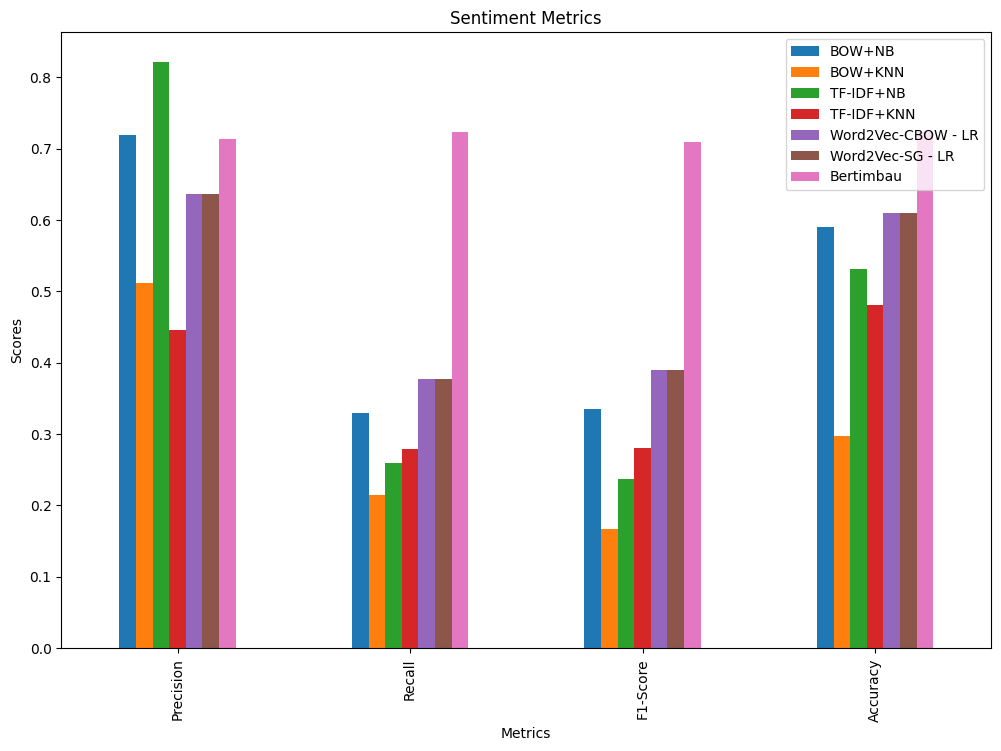

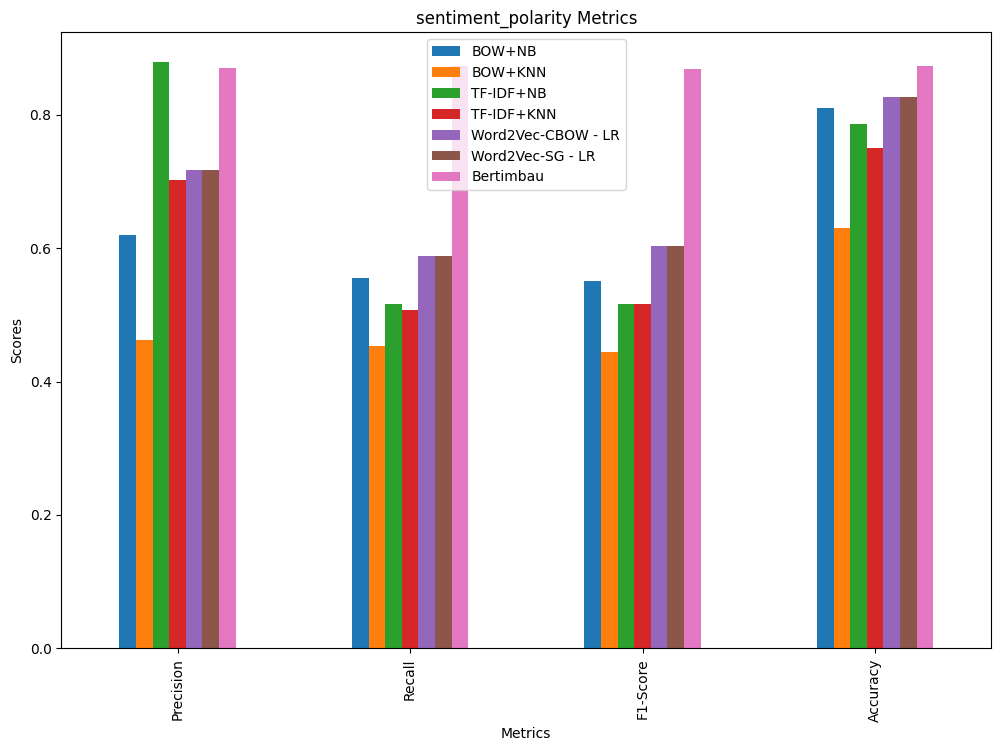

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados para 'Sentiment_binary'
data_sentiment = {
    "BOW+NB": [result_bownb['Precision'], result_bownb['Recall'], result_bownb['F1-Score'], result_bownb['Accuracy']],
    "BOW+KNN": [result_bowknn['Precision'], result_bowknn['Recall'], result_bowknn['F1-Score'], result_bowknn['Accuracy']],
    "TF-IDF+NB": [result_tfidfnb['Precision'], result_tfidfnb['Recall'], result_tfidfnb['F1-Score'], result_tfidfnb['Accuracy']],
    "TF-IDF+KNN": [result_tfidfknn['Precision'], result_tfidfknn['Recall'], result_tfidfknn['F1-Score'], result_tfidfknn['Accuracy']],
    "Word2Vec-CBOW - LR": [results_sentiment_w2v.iloc[0,1], results_sentiment_w2v.iloc[0,2], results_sentiment_w2v.iloc[0,3], results_sentiment_w2v.iloc[0,4]],
    "Word2Vec-SG - LR": [results_sentiment_sg_w2v.iloc[0,1], results_sentiment_sg_w2v.iloc[0,2], results_sentiment_sg_w2v.iloc[0,3], results_sentiment_sg_w2v.iloc[0,4]],
    "Bertimbau": [evaluation_metrics_sentiment['eval_Precision'], evaluation_metrics_sentiment['eval_Recall'],  evaluation_metrics_sentiment['eval_F1-Score'], evaluation_metrics_sentiment['eval_Accuracy']]
}

metrics = ["Precision", "Recall", "F1-Score", "Accuracy"]

# Criando DataFrame
df_sentiment = pd.DataFrame(data_sentiment, index=metrics).astype(float)

# Dados para 'sentiment_polarity'
data_sentiment_polarity = {
    "BOW+NB": [result_bownb1['Precision'], result_bownb1['Recall'], result_bownb1['F1-Score'], result_bownb1['Accuracy']],
    "BOW+KNN": [result_bowknn2['Precision'], result_bowknn2['Recall'], result_bowknn2['F1-Score'], result_bowknn2['Accuracy']],
    "TF-IDF+NB": [result_tfidfnb2['Precision'], result_tfidfnb2['Recall'], result_tfidfnb2['F1-Score'], result_tfidfnb2['Accuracy']],
    "TF-IDF+KNN": [result_tfidfknn2['Precision'], result_tfidfknn2['Recall'], result_tfidfknn2['F1-Score'], result_tfidfknn2['Accuracy']],
    "Word2Vec-CBOW - LR": [results_sentiment_polarity_w2v.iloc[0,1], results_sentiment_polarity_w2v.iloc[0,2], results_sentiment_polarity_w2v.iloc[0,3], results_sentiment_polarity_w2v.iloc[0,4]],
    "Word2Vec-SG - LR": [results_sentiment_polarity_sg_w2v.iloc[0,1], results_sentiment_polarity_sg_w2v.iloc[0,2], results_sentiment_polarity_sg_w2v.iloc[0,3], results_sentiment_polarity_sg_w2v.iloc[0,4]],
    "Bertimbau": [evaluation_metrics_polarity['eval_Precision'], evaluation_metrics_polarity['eval_Recall'],  evaluation_metrics_polarity['eval_F1-Score'], evaluation_metrics_polarity['eval_Accuracy']]
}

# Criando DataFrame
df_sentiment_polarity = pd.DataFrame(data_sentiment_polarity, index=metrics).astype(float)

# Função para criar histogramas
def plot_histogram(df, title):
    df.plot(kind='bar', figsize=(12, 8))
    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.legend(loc='best')
    plt.show()

# Plotando histogramas
plot_histogram(df_sentiment, 'Sentiment Metrics')
plot_histogram(df_sentiment_polarity, 'sentiment_polarity Metrics')

---
#Predição de quatro comentários não existentes no conjunto original de treino utilizando Bertimbau
---

Os comentários são:
 * "Para compras baratas e com entregas rápidas, esse aplicativo é ótimo e super recomendo, apenas deve-se ter o cuidado com os comentários nas compras, para não ter erros." --> sentiment: happiness, polarity: positive

 * "Os filmes no amazon prime ficam travando e as vezes o aplicativo cai voltando para a programação da TV, mas em relação aos fretes grátis e desconto em produtos nao há como reclamar, super recomendo. " --> sentiment: sadness, polarity: positive

 *   "A duas semanas eu estou tentando comprar uma jaqueta na Shein, porém sem sucesso. Acontece que, o vendedor não esta colocando as informacoes completas na remessa do pacote, fazendo assim, o mesmo ser negado na receita federal." --> sentiment: disgust, polarity: negative

*  "O Instagram está ficando cada vez mais lento e me deixando com raiva de usar. O algoritmo não mostra mais o conteúdo dos meus amigos, só anúncios e posts sugeridos. Perdeu a essência que tinha no começo" --> sentiment: anger, polarity: negative

In [77]:
sentiment_real = ['happiness','sadness','disgust','anger']
sentiment_polarity_real= ['positive','positive','negative','negative']


test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_content_jai.csv', encoding='utf-8')
data_contentTest = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_content3.csv')
test_data.head()


,reviewId,app_name,content,sentiment_polarity,sentiment
0,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,"Para compras baratas e com entregas rápidas, e...",positive,happiness
1,01e23c15-44bf-46b7-b280-40e880d9d4945,Amazon,Os filmes no amazon prime ficam travando e as ...,positive,sadness
2,df40ba7c-075d-48dc-b798-21466dfb41d6,Shein,A duas semanas eu estou tentando comprar uma j...,negative,disgust
3,59490b23-b17b-4bba-855b-b5053dadc0db,Instagram,O Instagram está ficando cada vez mais lento e...,negative,anger


In [78]:
test_data['content'] = test_data['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))
test_data['content'] = test_data['content'].apply(lambda x: x.lower())
test_data['content'] = test_data['content'].apply(remove_stopwords)
test_data['content']

,content
0,compras baratas entregas rápidas aplicativo ót...
1,filmes amazon prime ficam travando vezes aplic...
2,duas semanas tentando comprar jaqueta shein po...
3,instagram ficando cada vez lento deixando raiv...


In [79]:
test_data['tokens'] = test_data['content'].apply(lambda x: nltk.word_tokenize(x))
test_data['tokens']

,tokens
0,"[compras, baratas, entregas, rápidas, aplicati..."
1,"[filmes, amazon, prime, ficam, travando, vezes..."
2,"[duas, semanas, tentando, comprar, jaqueta, sh..."
3,"[instagram, ficando, cada, vez, lento, deixand..."


In [80]:
vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(test_data['content'])
X_test= pd.DataFrame(X_test.toarray(),columns=vectorizer.get_feature_names_out())
X_test

,acontece,algoritmo,amazon,amigos,anúncios,apenas,aplicativo,assim,baratas,cada,...,tentando,ter,travando,tv,usar,vendedor,vez,vezes,voltando,ótimo
0,0,0,0,0,0,1,1,0,1,0,...,0,2,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [81]:
test_data['content']

,content
0,compras baratas entregas rápidas aplicativo ót...
1,filmes amazon prime ficam travando vezes aplic...
2,duas semanas tentando comprar jaqueta shein po...
3,instagram ficando cada vez lento deixando raiv...


In [82]:
inputs = tokenizer_sentiment_result(test_data['content'].tolist(), truncation=True, padding='max_length', max_length=128, return_tensors='pt')

# Verificar se a GPU está disponível e definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mover o modelo para o dispositivo correto
model_sentiment_result.to(device)

# Mover os tensores de entrada para o dispositivo correto (GPU ou CPU)
inputs = {key: value.to(device) for key, value in inputs.items()}

model_sentiment_result.eval()

# Realizar a predição sem calcular gradientes
with torch.no_grad():
    outputs = model_sentiment_result(**inputs)
    logits_sentiment = outputs.logits

# Converter logits em predições de sentimento e polaridade
predicted_labels_sentiment = torch.argmax(logits_sentiment, axis=-1).cpu().numpy()  # Predição de sentimento

# Mapear os rótulos de volta para as classes originais de sentimentos e polaridades
label_encoder_sentiment = LabelEncoder()
label_encoder_sentiment.classes_ = np.array(['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'])

predicted_sentiments = label_encoder_sentiment.inverse_transform(predicted_labels_sentiment)


O método **fit** ajusta o classificador KNeighborsClassifier aos dados fornecidos. No caso do KNN, isso significa que o modelo armazena os exemplos de treinamento e suas respectivas classes, ou seja, a classificação de novos dados é baseada na comparação com os exemplos armazenados. Quando um novo dado é passado para o classificador, o KNN calcula a distância entre esse novo dado e os exemplos armazenados durante o fit. Ele então determina a classe do novo dado com base nas classes dos k vizinhos mais próximos.

In [83]:
predictions_bert= pd.DataFrame(predicted_sentiments, columns=['sentiment'])
predictions_bert['sentiment'] = predictions_bert['sentiment']
predictions_bert

,sentiment
0,happiness
1,happiness
2,disgust
3,disgust


In [84]:
inputs = tokenizer_polarity_result(test_data['content'].tolist(), truncation=True, padding='max_length', max_length=128, return_tensors='pt')

# Verificar se a GPU está disponível e definir o dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mover o modelo para o dispositivo correto
model_polarity_result.to(device)

# Mover os tensores de entrada para o dispositivo correto (GPU ou CPU)
inputs = {key: value.to(device) for key, value in inputs.items()}

model_polarity_result.eval()

# Realizar a predição sem calcular gradientes
with torch.no_grad():
    outputs = model_polarity_result(**inputs)
    logits_polarity = outputs.logits

# Converter logits em predições de sentimento e polaridade
predicted_labels_polarity = torch.argmax(logits_polarity, axis=-1).cpu().numpy()  # Predição de polarity

# Mapear os rótulos de volta para as classes originais de polarityos e polaridades
label_encoder_polarity = LabelEncoder()
label_encoder_polarity.classes_ = np.array(['negative', 'neutral', 'positive'])

predicted_polaritys = label_encoder_polarity.inverse_transform(predicted_labels_polarity)


In [85]:
predictions_bert2= pd.DataFrame(predicted_polaritys, columns=['sentiment_polarity'])
predictions_bert2['sentiment_polarity'] = predictions_bert2['sentiment_polarity']
predictions_bert2

,sentiment_polarity
0,positive
1,positive
2,negative
3,negative


In [86]:
predict_val = pd.DataFrame({'sentiment_real':sentiment_real, 'sentiment_polarity_real':sentiment_polarity_real, 'sentiment':predictions_bert['sentiment'], 'sentiment_polarity':predictions_bert2['sentiment_polarity']})
predict_val

,sentiment_real,sentiment_polarity_real,sentiment,sentiment_polarity
0,happiness,positive,happiness,positive
1,sadness,positive,happiness,positive
2,disgust,negative,disgust,negative
3,anger,negative,disgust,negative


---
#Utilizando Wor2Vec + LG
---

In [87]:
from transformers import AutoTokenizer, AutoModel
import gensim.utils

test_data2  = pd.DataFrame(test_data)
test_data2

,reviewId,app_name,content,sentiment_polarity,sentiment,tokens
0,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,compras baratas entregas rápidas aplicativo ót...,positive,happiness,"[compras, baratas, entregas, rápidas, aplicati..."
1,01e23c15-44bf-46b7-b280-40e880d9d4945,Amazon,filmes amazon prime ficam travando vezes aplic...,positive,sadness,"[filmes, amazon, prime, ficam, travando, vezes..."
2,df40ba7c-075d-48dc-b798-21466dfb41d6,Shein,duas semanas tentando comprar jaqueta shein po...,negative,disgust,"[duas, semanas, tentando, comprar, jaqueta, sh..."
3,59490b23-b17b-4bba-855b-b5053dadc0db,Instagram,instagram ficando cada vez lento deixando raiv...,negative,anger,"[instagram, ficando, cada, vez, lento, deixand..."


In [88]:
lg = LogisticRegression(max_iter=1000)
model_w2v = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_w2v.txt')


tokens = test_data['tokens']

def get_embedding_w2v(tokens, model ):
    valid_words = [word for word in tokens if word in model]
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)
    else:
        return np.zeros(300)

test_data2['embedding_cbow'] = test_data2['tokens'].apply(lambda x: get_embedding_w2v(x, model_w2v))
test_data2.to_csv('/content/drive/MyDrive/Colab Notebooks/test_data2.csv', index=False)
test_data2.loc[0, 'embedding_cbow']

array([ 0.1768935 ,  0.50143725, -0.08310041,  0.17570394,  0.05585449,
       -0.3484239 ,  0.1936744 ,  0.13274333,  0.03960596,  0.33949384,
        0.31927475, -0.17491826,  0.29189068,  0.3910209 ,  0.05826694,
       -0.0652917 ,  0.11436756, -0.28197643,  0.02633583,  0.29353872,
        0.07264411, -0.15929143,  0.5305928 , -0.06343929,  0.24279262,
       -0.0530533 ,  0.17829783, -0.07450131, -0.33388412, -0.14159799,
       -0.00939417, -0.402356  , -0.11066195, -0.06961831,  0.10267068,
       -0.15821508, -0.02889089, -0.24284801,  0.08906446,  0.14041416,
        0.02624592, -0.07085463, -0.02130442,  0.11369467, -0.01255445,
       -0.09792363,  0.17496853, -0.09017065,  0.02104017,  0.08667239,
       -0.1555704 , -0.07508525, -0.2519608 ,  0.10673163,  0.07915808,
        0.24101506,  0.10078849,  0.07322954, -0.25251704, -0.17638834,
        0.02426755, -0.17234574,  0.19179204,  0.15019614, -0.08334919,
        0.04545056, -0.09935805, -0.02311809,  0.04257643, -0.21

Como a Regressão Logística realiza um ajuste ativo dos parâmetros do modelo durante o treinamento, o método fit calcula os coeficientes (pesos) que definem a relação entre as características de entrada e a variável de saída (classe) usando um processo de otimização. O algoritmo de otimização ajusta os coeficientes da função logística para minimizar a função de custo, O fit usa algoritmos de otimização para encontrar os melhores coeficientes que minimizam a função de custo (ou função objetivo). No caso da regressão logística, a função de custo é geralmente a log-verossimilhança (log-likelihood) negativa, que mede a diferença entre as previsões do modelo e as classes reais. Para cada característica (input), o modelo calcula a probabilidade de cada classe com base nos coeficientes ajustados.

In [89]:
X_test = np.vstack(test_data2['embedding_cbow'].values)

pred = lg.fit(X_w2v, y_w2v)
y_pred_sentiment2 = lg.predict(X_test)
predictions_df2 = pd.DataFrame(y_pred_sentiment2, columns=['sentiment'])
predictions_df2['sentiment'] = predictions_df2['sentiment']
predictions_df2



,sentiment
0,happiness
1,happiness
2,disgust
3,anger


In [90]:
X_test_sentiment_polarity = np.vstack(test_data2['embedding_cbow'].values)

pred = lg.fit(X_w2v1, y_w2v1)
y_pred_sentiment2_sentiment_polarity = lg.predict(X_test_sentiment_polarity)
predictions_df2_sentiment_polarity = pd.DataFrame(y_pred_sentiment2_sentiment_polarity, columns=['sentiment_polarity'])
predictions_df2_sentiment_polarity['sentiment_polarity'] = predictions_df2_sentiment_polarity['sentiment_polarity']
predictions_df2_sentiment_polarity


,sentiment_polarity
0,positive
1,positive
2,negative
3,negative


In [91]:
predict_val_sentiment_polarity = pd.DataFrame({'sentiment_real':sentiment_real, 'sentiment_polarity_real':sentiment_polarity_real, 'sentiment_value':predictions_df2['sentiment'], 'sentiment_polarity_value':predictions_df2_sentiment_polarity['sentiment_polarity']})
predict_val_sentiment_polarity

,sentiment_real,sentiment_polarity_real,sentiment_value,sentiment_polarity_value
0,happiness,positive,happiness,positive
1,sadness,positive,happiness,positive
2,disgust,negative,disgust,negative
3,anger,negative,anger,negative


Comparação de Performance

Categoria: **sentiment**

  Bertimbau :

* Precision: 0.714
* Recall: 0.723
* F1-score: 0.709
* Accuracy: 0.723

  Word2Vec - Logistic Regression:

* Precision: 0.637
* Recall: 0.377
* F1-score: 0.390
* Accuracy: 0.610

Categoria: **sentimento_polarity**

   Bertimbau :

* Precision: 0.870
* Recall: 0.874
* F1-score: 0.869
* Accuracy: 0.874

   Word2Vec - Logistic Regression:

* Precision: 0.717
* Recall: 0.588
* F1-score: 0.603
* Accuracy: 0.827

Para a categoria sentiment, o modelo Bertimbau  apresenta um desempenho significativamente superior em todas as métricas comparadas ao modelo Word2Vec - Logistic Regression.
* Precision: Bertimbau  (0.714) > Word2Vec - LR (0.637)
* Recall: Bertimbau  (0.723) > Word2Vec - LR (0.377)
* F1-score: Bertimbau  (0.709) > Word2Vec - LR (0.390)
* Accuracy: Bertimbau  (0.723) > Word2Vec - LR (0.610)

Para a categoria sentiment_polarity, o modelo Bertimbau  também apresenta melhores resultados em todas as métricas:

* Precision: Bertimbau  (0.870) > Word2Vec - LR (0.717)
* Recall: Bertimbau  (0.874) > Word2Vec - LR (0.588)
* F1-score: Bertimbau  (0.869) > Word2Vec - LR (0.603)
* Accuracy: Bertimbau  (0.874) > Word2Vec - LR (0.827)

Conclusão

A estratégia Bertimbau tem uma performance superior em todas as métricas (precisão, revocação, F1-score e acurácia) para ambas as categorias sentiment e sentimento_polarity.

Porém decidiu-se realizar as previsões com ambas estratégias com melhores resultados e a previsão de Word2Vec foi mais próxima aos sentimentos e polaridades reais do que o Bertimbau.

A decisão de utilizar as previsões do Word2Vec mesmo com métricas quantitativamente inferiores ao Bertimbau - KNN pode ser explicada por alguns fatores qualitativos que impactam o desempenho prático dos modelos:

**Generalização dos Modelos:** Apesar de o Bertimbau - KNN apresentar métricas melhores como precisão, recall, F1-score e acurácia, é possível que ele esteja superajustado ao conjunto de dados de treinamento. Isso significa que, embora o modelo tenha um desempenho excelente nos dados de teste, ele pode não generalizar bem para novos dados, ou seja, suas previsões podem ser menos consistentes ou realistas em diferentes contextos.

**Interpretação de Palavras Contextuais:** O Word2Vec (particularmente nos modos CBOW ou Skip-gram) capta melhor as relações semânticas entre palavras ao usar vetores de palavras baseados no contexto. Ele pode gerar representações mais nuançadas do sentimento e da polaridade, capturando sutilezas do texto que são mais próximas dos sentimentos reais expressos nas frases, mesmo que suas métricas gerais sejam um pouco inferiores.

**Distribuição de Erros:** O Word2Vec pode estar cometendo erros em categorias menos relevantes ou com menor impacto nas métricas gerais, mas suas previsões podem ser mais próximas do sentimento real em categorias principais ou críticas. Por exemplo, ele pode errar em previsões que afetam menos a acurácia geral, mas captar melhor os sentimentos expressos em cenários complexos.

**Sensibilidade a Variações:** O modelo Word2Vec pode ser mais sensível a pequenas variações na formulação do texto ou nuances no vocabulário, proporcionando previsões que estão mais alinhadas com o sentimento ou polaridade reais percebidos pelos humanos. Isso pode torná-lo mais robusto em cenários do mundo real, onde os textos podem ser mais variados do que os presentes nos dados de treino/teste.

**Polaridade em Sentimentos Mistos:** O Bertimbau - KNN pode ter uma abordagem mais direta para classificar polaridades, enquanto o Word2Vec pode ser mais eficaz em capturar nuances em textos com sentimentos mistos, sendo mais alinhado com a percepção humana de sentimentos complexos.

Em resumo, a escolha do **Word2Vec + LG** como o modelo final, mesmo com métricas quantitativas inferiores, pode ser justificada pelo fato de suas previsões estarem mais alinhadas com a realidade percebida nos sentimentos e polaridades dos textos, sugerindo uma melhor adequação prática ao domínio específico dos dados.

 ✅ BERT (Bidirectional Encoder Representations from Transformers) é um modelo de pré-treinamento de PLN de código aberto e é a primeira representação de linguagem profundamente bidirecional, não supervisionada e pré-treinada usando apenas um corpus de texto simples. Facilitando o uso de um modelo de PLN sem precisar coletar seus próprios conjuntos de dados massivos para treinamento.
 O BERT pode ser utilizado para gerar representações ricas e contextualizadas de texto, capturando nuances e relações semânticas profundas.

↪ **Vantagens:**

  * Captura o contexto bidirecionalmente, compreendendo melhor o significado das palavras em relação ao seu contexto.

  * Alta performance em tarefas de classificação de texto, como sentimento e polaridade.

  * Pré-treinamento em grandes corpora de texto permite um melhor entendimento da linguagem.

  * Simplicidade e facilidade de implementação.
     
  * Eficaz para conjuntos de dados pequenos e com pouca complexidade.

↪ **Desvantagens:**
  * Bertimbau pode ser computacionalmente caro para treinar e usar, devido à sua complexidade.


✅ Word2Vec é uma técnica de geração de vetores de palavras que transforma palavras em vetores de alta dimensionalidade com base em seus contextos em grandes corpora de texto. Utiliza duas arquiteturas principais: CBOW (Continuous Bag of Words) e Skip-gram. A Regressão Logística é um modelo de classificação linear que estima a probabilidade de uma amostra pertencer a uma classe usando uma função logística. É amplamente utilizada para tarefas de classificação binária e pode ser estendida para classificação multiclasse.

↪ **Vantagens:**

 * Produz vetores densos e significativos que capturam as relações semânticas entre palavras.

 * Menos computacionalmente intensivo em comparação com modelos mais complexos como o BERT.

 * Simples de implementar e interpretar.

 * Rápido de treinar e aplicar, mesmo em grandes conjuntos de dados.

 ↪ **Desvantagens:**
  * Word2Vec pode não capturar completamente o contexto bidirecional, limitando sua capacidade de compreensão contextual.

  * Regressão Logística pode ser menos eficiente para problemas com complexas relações não lineares.

Comparação Geral

  * Complexidade e Capacidade:
      
     ↪ Bertimbau é um modelo mais complexo e capaz de capturar dependências contextuais bidirecionais, enquanto o Word2Vec gera representações vetoriais de palavras baseadas em contextos locais.
  
  * Desempenho:

       ↪ Bertimbau tem demonstrado melhor desempenho em métricas como precisão, revocação, F1-score e acurácia em tarefas de classificação de sentimento e polaridade, conforme os resultados fornecidos.

       ↪ Word2Vec com Regressão Logística, apesar de ser menos computacionalmente intensivo, apresenta menor performance em comparação, porém é melhor em relação aos outros analisados.

  * Aplicabilidade:

       ↪ Bertimbau é mais adequado para tarefas complexas de NLP que exigem compreensão profunda do contexto, enquanto Word2Vec com Regressão Logística pode ser suficiente para tarefas mais simples ou onde recursos computacionais são limitados.